Attempting Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module

# Essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scikit-learn utilities
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Set up matplotlib for inline display
%matplotlib inline

In [66]:
df = pd.read_csv("/content/titanic_dataset - Final_Final.csv")
target_column = "Survived"
#0 for male, 1 for female

X = df.drop(target_column, axis=1).values  # Features
y = df[target_column].values    #target

#331 training examples after cleansing
print(df)

     Survived  Pclass  Age  Sibsp     Fare
0           0       3   35      0    7.829
1           1       3   47      1    7.000
2           0       2   62      0    9.688
3           0       3   27      0    8.663
4           1       3   22      1   12.288
..        ...     ...  ...    ...      ...
326         1       3    3      1   13.775
327         1       1   37      1   90.000
328         1       3   28      0    7.775
329         1       1   39      0  108.900
330         0       3   39      0    7.250

[331 rows x 5 columns]


In [67]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
#split data into training and testing
#using a 75% training to 25% testing set split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)


from imblearn.over_sampling import SMOTE

# Address Training imbalance
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


print(X_train.shape)


(294, 4)


In [68]:
#Feature Transformation 1: Scaling/Normalizing the data
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)
X_ts_scaled = scaler.transform(X_test)

print(X_tr_scaled.shape)


(294, 4)


In [69]:
#Feature Transformation 2: Polynomal Transformation
poly = PolynomialFeatures(degree=2)  # Second Degree (x^2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y,random_state=42)


In [89]:
#Feature Transformation #3: Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_mm_train = scaler.fit_transform(X_train)
X_mm_test =  scaler.transform(X_test)


Unscaled Data, w [[-0.03029839  0.00815458  0.0703755   0.15890073]]
Unscaled Data, intercept [0.0013223]
confusion matrix [[ 0 57]
 [ 0 26]]
report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.31      1.00      0.48        26

    accuracy                           0.31        83
   macro avg       0.16      0.50      0.24        83
weighted avg       0.10      0.31      0.15        83

accuracy of the test set: 0.3132530120481928
accuracy of the train set: 0.5
[0.         0.31325301] [0. 1.] [0.         0.47706422]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

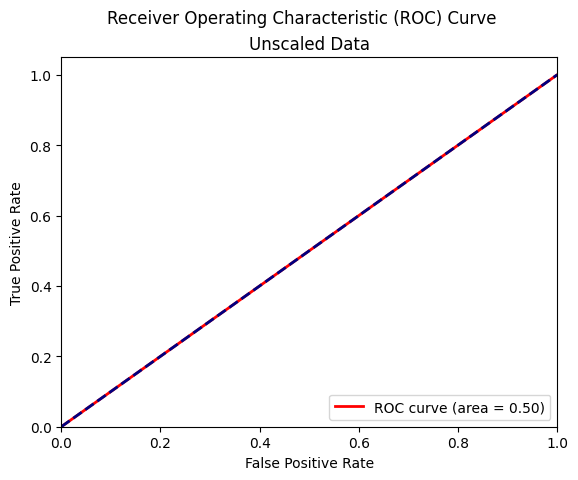

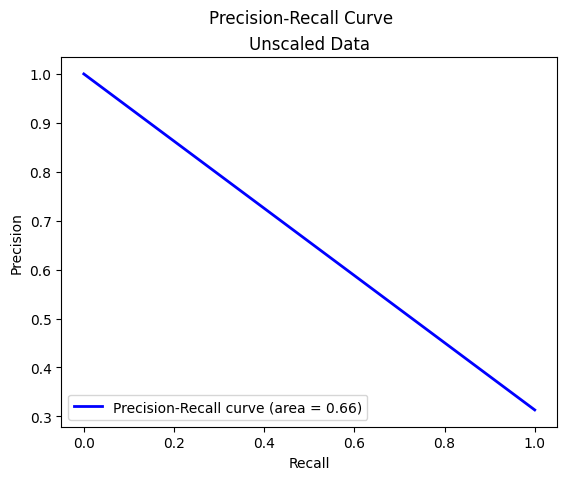

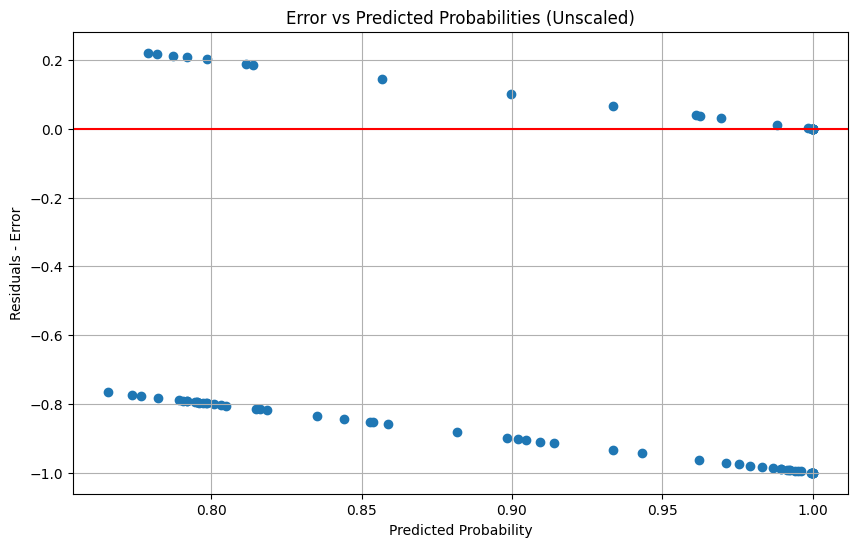

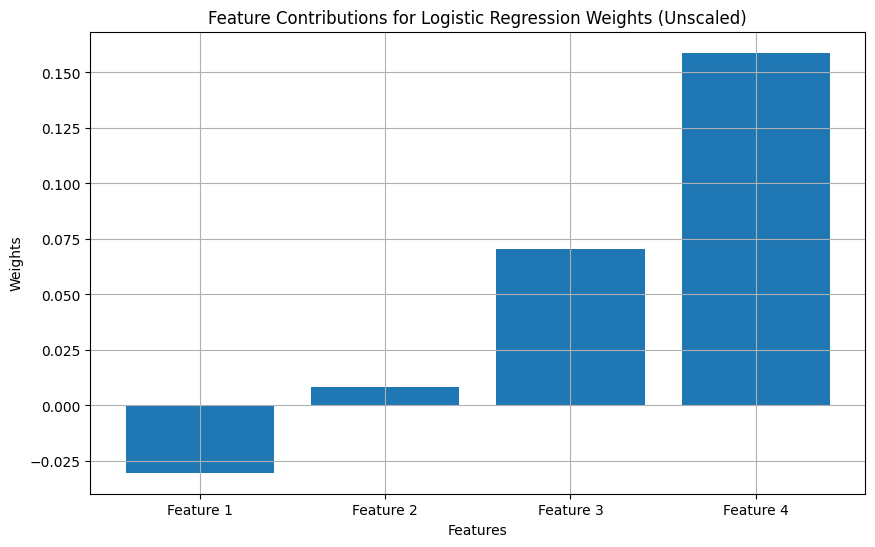

In [101]:
#implementing logistic regression (Unscaled Data)
from sklearn import linear_model
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc


logreg = linear_model.LogisticRegression(penalty = 'l2', max_iter=1000, C=0.02)
logreg.fit(X_tr_scaled, y_train)

w_logreg = logreg.coef_
intercept_logreg = logreg.intercept_

print("Unscaled Data, w", w_logreg)
print("Unscaled Data, intercept", intercept_logreg)


y_hat_logreg = logreg.predict(X_test)
acc_logreg = logreg.score(X_test, y_test)
acc_logreg_train = logreg.score(X_train, y_train)


confusion_report = confusion_matrix(y_test, logreg.predict(X_test))
report = classification_report(y_test, y_hat_logreg)

print("confusion matrix", confusion_report)
print("report", report)

print("accuracy of the test set:", acc_logreg)
print("accuracy of the train set:", acc_logreg_train)

prec, recal, fscore, sup = precision_recall_fscore_support(y_test, y_hat_logreg)

print(prec, recal, fscore)


#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_hat_logreg)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle('Receiver Operating Characteristic (ROC) Curve')
plt.title('Unscaled Data')

plt.legend(loc="lower right")
plt.show()


precision, recall, _ = precision_recall_curve(y_test, y_hat_logreg)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.suptitle('Precision-Recall Curve')
plt.title('Unscaled Data')

plt.legend(loc="lower left")
plt.show()



y_pred_probability = logreg.predict_proba(X_test)[:,1]

# Calculate residuals
error = y_test - y_pred_probability

# Plot residuals vs predicted probabilities
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_probability, error)
plt.xlabel('Predicted Probability')
plt.ylabel('Residuals - Error')
plt.title('Error vs Predicted Probabilities (Unscaled)')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(range(len(logreg.coef_[0])), logreg.coef_[0])
plt.xticks(range(len(logreg.coef_[0])), ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'])
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Feature Contributions for Logistic Regression Weights (Unscaled)')
plt.grid(True)
plt.show()

accuracy of the test set: 0.6626506024096386
accuracy of the train set: 0.5578231292517006
w [[ 0.0024049  -0.00065531  0.09565942  0.26418335]]
intercept [0.00442376]
[0.75438596 0.46153846] [0.75438596 0.46153846] [0.75438596 0.46153846]
confusion matrix [[43 14]
 [14 12]]
report               precision    recall  f1-score   support

           0       0.75      0.75      0.75        57
           1       0.46      0.46      0.46        26

    accuracy                           0.66        83
   macro avg       0.61      0.61      0.61        83
weighted avg       0.66      0.66      0.66        83



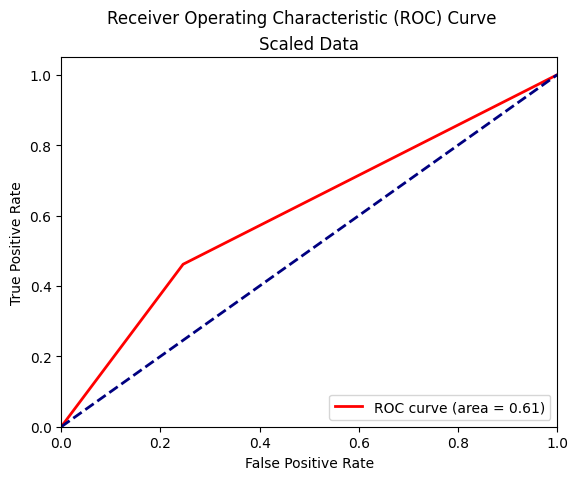

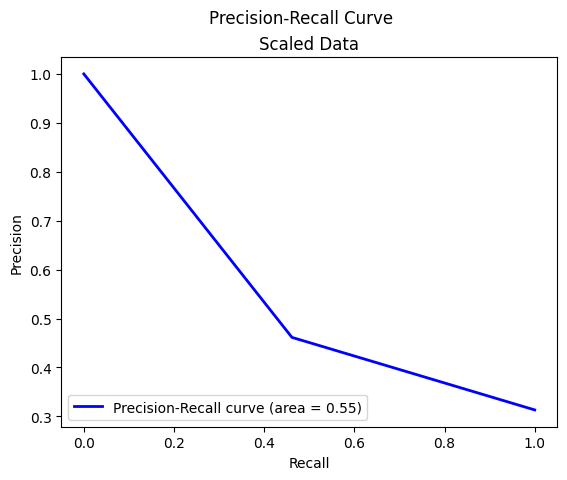

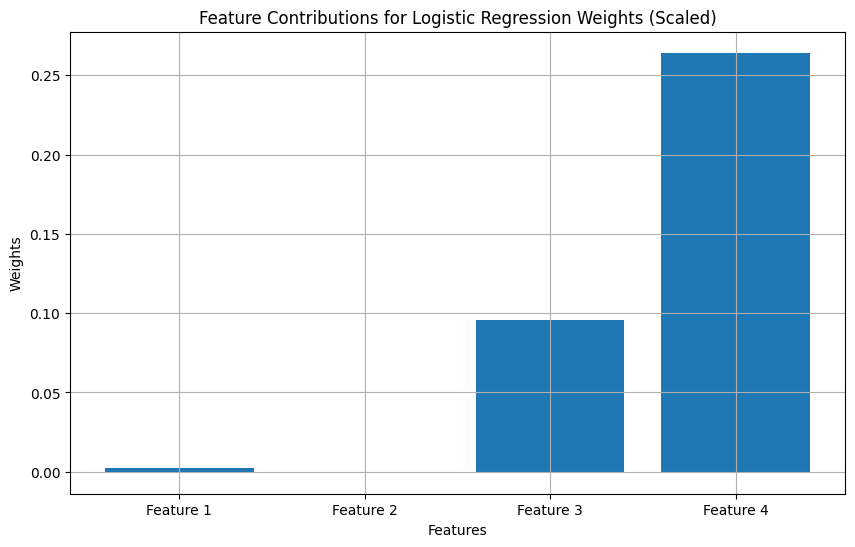

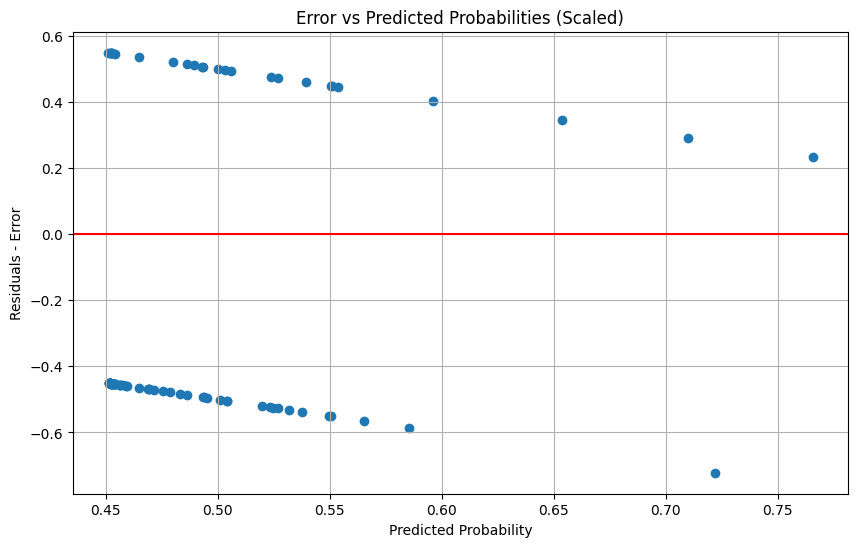

In [100]:
#Feature Transformation 1 (Normalization): W & Intercept Values

logreg = linear_model.LogisticRegression(penalty = 'l2', max_iter=1000, C=0.10)
logreg.fit(X_tr_scaled, y_train)

w_logreg = logreg.coef_
intercept_logreg = logreg.intercept_

y_hat_logreg = logreg.predict(X_ts_scaled)
acc_logreg = logreg.score(X_ts_scaled, y_test)
acc_logreg_train = logreg.score(X_tr_scaled, y_train)

print("accuracy of the test set:", acc_logreg)
print("accuracy of the train set:", acc_logreg_train)

print("w", w_logreg)
print("intercept", intercept_logreg)

prec, recal, fscore, sup = precision_recall_fscore_support(y_test, y_hat_logreg)

print(prec, recal, fscore)
logreg.score(X_ts_scaled, y_test)

#confusion matrix + classification report (precision, recall, fl-score)
confusion_report = confusion_matrix(y_test, logreg.predict(X_ts_scaled))
report = classification_report(y_test, y_hat_logreg)

print("confusion matrix", confusion_report)
print("report", report)

'''
Confusion Matrix output: [[TN, FP], [FN, TP]]

'''

#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_hat_logreg)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle('Receiver Operating Characteristic (ROC) Curve')
plt.title('Scaled Data')

plt.legend(loc="lower right")
plt.show()



precision, recall, _ = precision_recall_curve(y_test, y_hat_logreg)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.suptitle('Precision-Recall Curve')
plt.title('Scaled Data')

plt.legend(loc="lower left")
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(range(len(logreg.coef_[0])), logreg.coef_[0])
plt.xticks(range(len(logreg.coef_[0])), ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'])
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Feature Contributions for Logistic Regression Weights (Scaled)')
plt.grid(True)
plt.show()


y_pred_probability = logreg.predict_proba(X_ts_scaled)[:,1]
error = y_test - y_pred_probability

# Plot residuals vs predicted probabilities
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_probability, error)
plt.xlabel('Predicted Probability')
plt.ylabel('Residuals - Error')
plt.title('Error vs Predicted Probabilities (Scaled)')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(True)
plt.show()

accuracy of the test set: 0.6626506024096386
accuracy of the train set: 0.6088709677419355
w [[-3.79077423e-03 -8.01371194e-03 -4.06160997e-02  5.15518685e-03
  -2.40834985e-03 -1.37713322e-02  1.17382628e-03  8.58793993e-03
   8.46932050e-03  2.36072150e-04  1.97981968e-02  2.24887978e-04
   4.83374244e-03 -1.26144970e-02 -1.19725778e-05]]
intercept [-0.0038874]
[0.71014493 0.42857143] [0.85964912 0.23076923] [0.77777778 0.3       ]
confusion matrix [[49  8]
 [20  6]]
report               precision    recall  f1-score   support

           0       0.71      0.86      0.78        57
           1       0.43      0.23      0.30        26

    accuracy                           0.66        83
   macro avg       0.57      0.55      0.54        83
weighted avg       0.62      0.66      0.63        83



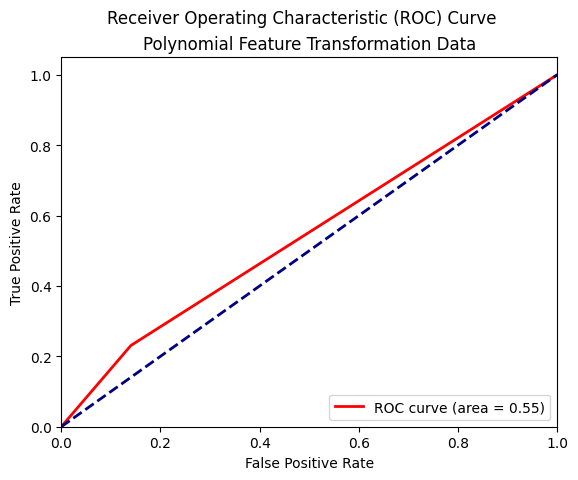

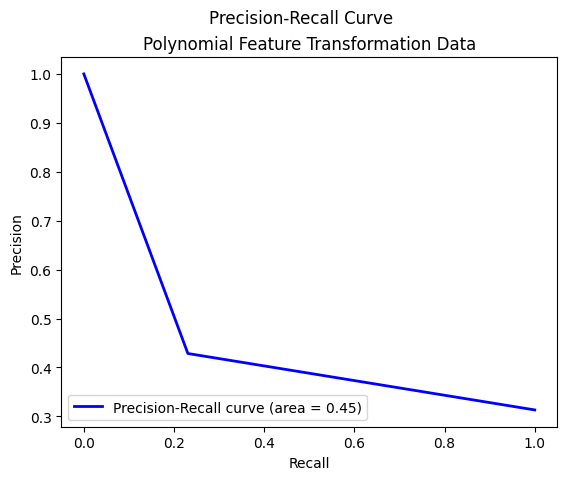

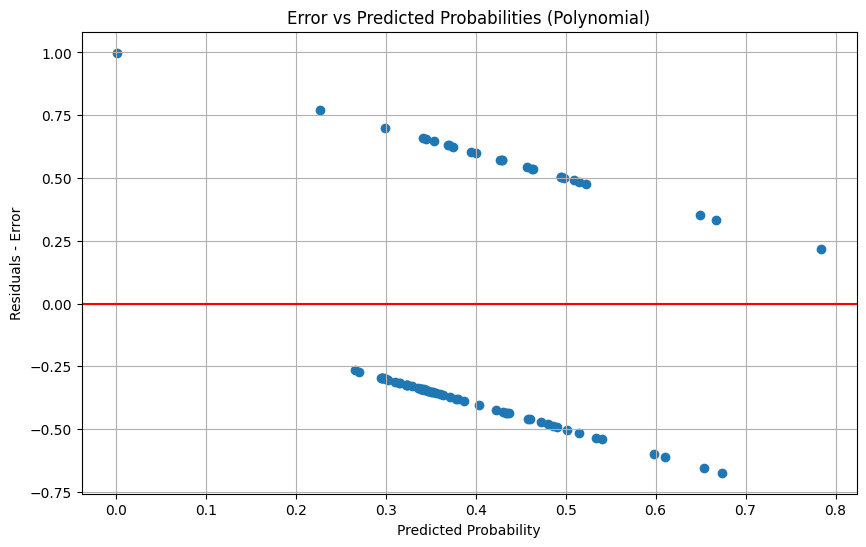

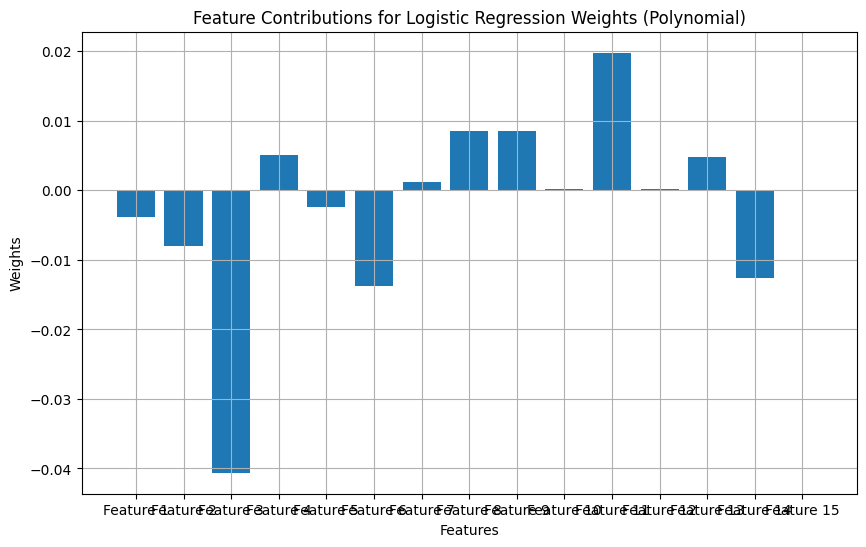

In [103]:
#Feature Transformation 2 (Polynomial Transformation k=2): W & Intercept Values

logreg.fit(X_train_poly, y_train_poly)

w_logreg = logreg.coef_
intercept_logreg = logreg.intercept_

y_hat_logreg = logreg.predict(X_test_poly)
acc_logreg = logreg.score(X_test_poly, y_test_poly)
acc_logreg_train = logreg.score(X_train_poly, y_train_poly)

'''
Trying a for loop with various polynomial degrees:

for i in range(1,5):

  poly = PolynomialFeatures(degree=i)  # Second Degree (x^2)

'''

print("accuracy of the test set:", acc_logreg)
print("accuracy of the train set:", acc_logreg_train)

print("w", w_logreg)
print("intercept", intercept_logreg)

prec, recal, fscore, sup = precision_recall_fscore_support(y_test_poly, y_hat_logreg)

print(prec, recal, fscore)
logreg.score(X_test_poly, y_test_poly)

#confusion matrix + classification report (precision, recall, fl-score)
confusion_report = confusion_matrix(y_test_poly, logreg.predict(X_test_poly))
report = classification_report(y_test_poly, y_hat_logreg)

print("confusion matrix", confusion_report)
print("report", report)

'''
Confusion Matrix output: [[TN, FP], [FN, TP]]

'''

#ROC curve
fpr, tpr, thresholds = roc_curve(y_test_poly, y_hat_logreg)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle('Receiver Operating Characteristic (ROC) Curve')
plt.title('Polynomial Feature Transformation Data')

plt.legend(loc="lower right")
plt.show()



precision, recall, _ = precision_recall_curve(y_test_poly, y_hat_logreg)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.suptitle('Precision-Recall Curve')
plt.title('Polynomial Feature Transformation Data')

plt.legend(loc="lower left")
plt.show()


y_pred_probability = logreg.predict_proba(X_test_poly)[:,1]
error = y_test_poly - y_pred_probability
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_probability, error)
plt.xlabel('Predicted Probability')
plt.ylabel('Residuals - Error')
plt.title('Error vs Predicted Probabilities (Polynomial)')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(range(len(logreg.coef_[0])), logreg.coef_[0])
plt.xticks(range(len(logreg.coef_[0])), ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6','Feature 7','Feature 8','Feature 9','Feature 10','Feature 11','Feature 12','Feature 13','Feature 14','Feature 15'])
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Feature Contributions for Logistic Regression Weights (Polynomial)')
plt.grid(True)
plt.show()


accuracy of the test set: 0.6385542168674698
accuracy of the training set: 0.5170068027210885
w [[-0.06869392  0.01715232  0.02037257  0.04899027]]
intercept [0.02450653]
[0.74545455 0.42857143] [0.71929825 0.46153846] [0.73214286 0.44444444]
confusion matrix [[41 16]
 [14 12]]
report               precision    recall  f1-score   support

           0       0.75      0.72      0.73        57
           1       0.43      0.46      0.44        26

    accuracy                           0.64        83
   macro avg       0.59      0.59      0.59        83
weighted avg       0.65      0.64      0.64        83



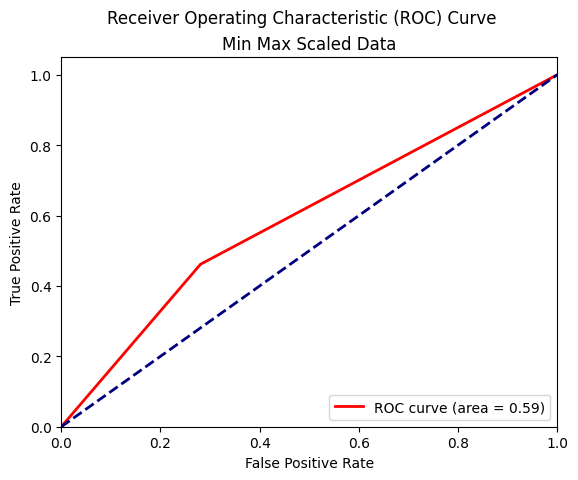

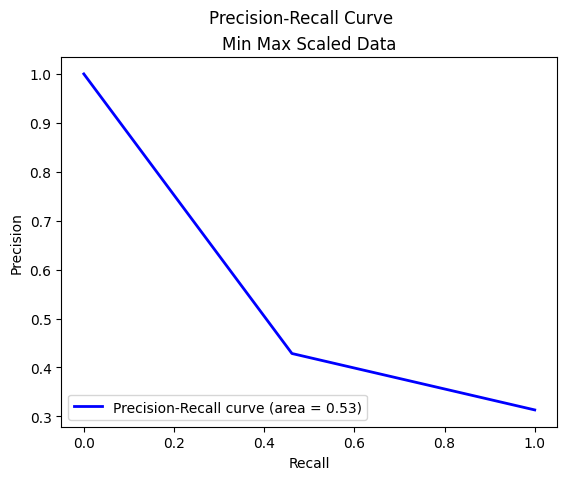

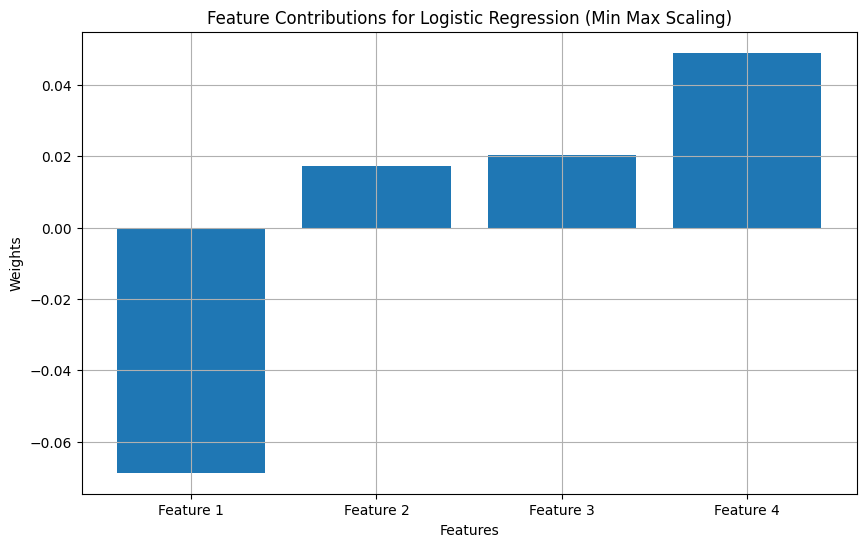

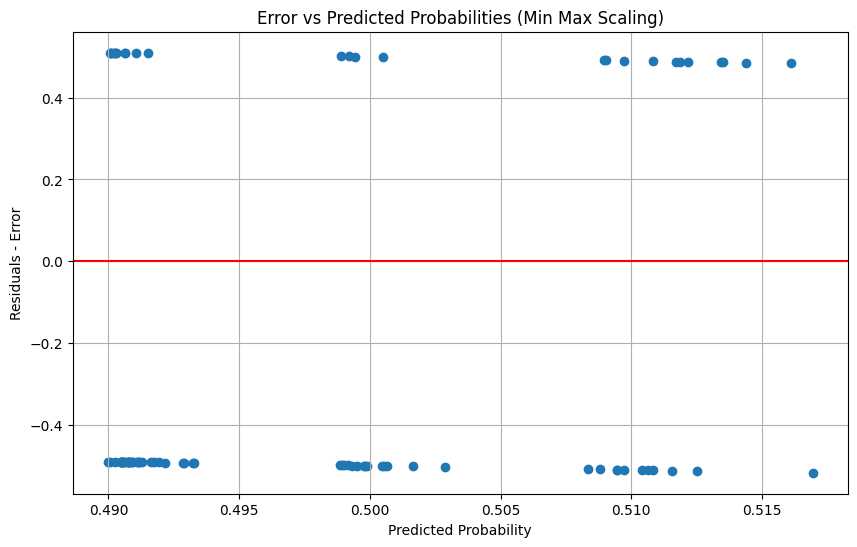

In [104]:
#Feature Transformation 3 (Min Max): W & Intercept Values

logreg.fit(X_mm_train, y_train)

w_logreg = logreg.coef_
intercept_logreg = logreg.intercept_

y_hat_logreg = logreg.predict(X_mm_test)
acc_logreg = logreg.score(X_mm_test, y_test)

y_hat_logreg_tr = logreg.predict(X_mm_train)
acc_logreg_tr = logreg.score(X_mm_train, y_train)


print("accuracy of the test set:", acc_logreg)
print("accuracy of the training set:", acc_logreg_tr)


print("w", w_logreg)
print("intercept", intercept_logreg)

prec, recal, fscore, sup = precision_recall_fscore_support(y_test, y_hat_logreg)

print(prec, recal, fscore)
logreg.score(X_mm_test, y_test)

#confusion matrix + classification report (precision, recall, fl-score)
confusion_report = confusion_matrix(y_test, logreg.predict(X_mm_test))
report = classification_report(y_test, y_hat_logreg)

print("confusion matrix", confusion_report)
print("report", report)

'''
Confusion Matrix output: [[TN, FP], [FN, TP]]

'''

#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_hat_logreg)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle('Receiver Operating Characteristic (ROC) Curve')
plt.title('Min Max Scaled Data')

plt.legend(loc="lower right")
plt.show()



precision, recall, _ = precision_recall_curve(y_test, y_hat_logreg)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.suptitle('Precision-Recall Curve')
plt.title('Min Max Scaled Data')

plt.legend(loc="lower left")
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(range(len(logreg.coef_[0])), logreg.coef_[0])
plt.xticks(range(len(logreg.coef_[0])), ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'])
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Weights for Logistic Regression (Min Max Scaling)')
plt.grid(True)
plt.show()


y_pred_probability = logreg.predict_proba(X_mm_test)[:,1]
error = y_test - y_pred_probability

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_probability, error)
plt.xlabel('Predicted Probability')
plt.ylabel('Residuals - Error')
plt.title('Error vs Predicted Probabilities (Min Max Scaling)')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(True)
plt.show()

